In [1]:
# Importando as bibliotecas necessárias
import numpy as np  # Para operações numéricas e manipulação de arrays
import pandas as pd  # Para manipulação e análise de dados tabulares
from sklearn.linear_model import LinearRegression  # Implementação do algoritmo de regressão linear
import matplotlib.pyplot as plt  # Para visualização de dados

In [2]:
# Carregando o dataset de compartilhamento de bicicletas
bike = pd.read_csv('bikeshare.csv')
# Exibindo as primeiras linhas do DataFrame para inspeção
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


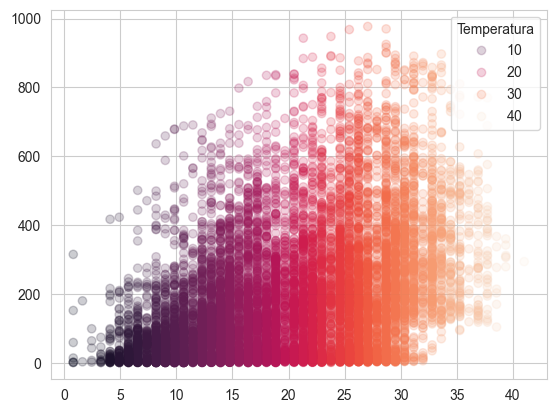

In [3]:
# Criando um gráfico de dispersão para visualizar a relação entre temperatura e contagem de bicicletas
fig, ax = plt.subplots()  # Criando uma figura e eixos
scatter = ax.scatter(bike['temp'], bike['count'],  # Temperatura no eixo x, contagem no eixo y
                     c=bike.temp, label=bike.temp, alpha=0.2)  # Colorindo pontos pela temperatura com transparência
ax.legend(*scatter.legend_elements(num=5),  # Criando uma legenda com 5 níveis de temperatura
          loc="upper right", title="Temperatura")  # Posicionando a legenda no canto superior direito
plt.show()  # Exibindo o gráfico

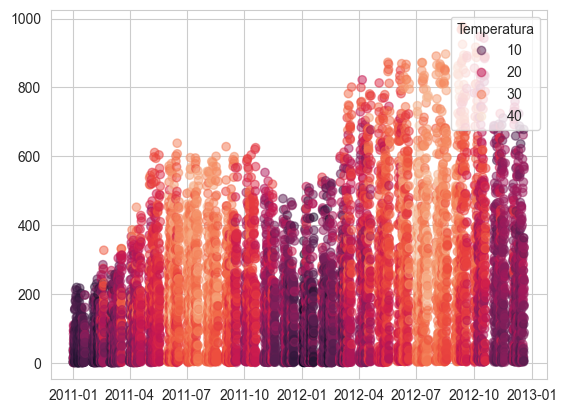

In [4]:
# Convertendo a coluna 'datetime' para o formato de data/hora do pandas
bike['datetime'] = pd.to_datetime(bike['datetime'])

# Criando um gráfico de dispersão para visualizar a distribuição temporal das contagens
fig, ax = plt.subplots()  # Criando uma figura e eixos
scatter = ax.scatter(bike['datetime'], bike['count'],  # Data/hora no eixo x, contagem no eixo y
                     c=bike.temp, label=bike.temp, alpha=0.5)  # Colorindo pontos pela temperatura
ax.legend(*scatter.legend_elements(num=5),  # Criando uma legenda com 5 níveis de temperatura
          loc="upper right", title="Temperatura")  # Posicionando a legenda no canto superior direito
plt.show()  # Exibindo o gráfico

In [5]:
# Calculando a matriz de correlação entre temperatura e contagem
# Para avaliar a intensidade da relação linear entre as variáveis
print(np.corrcoef(bike['temp'], bike['count']))  # Imprime a matriz de correlação

[[1.         0.39445364]
 [0.39445364 1.        ]]


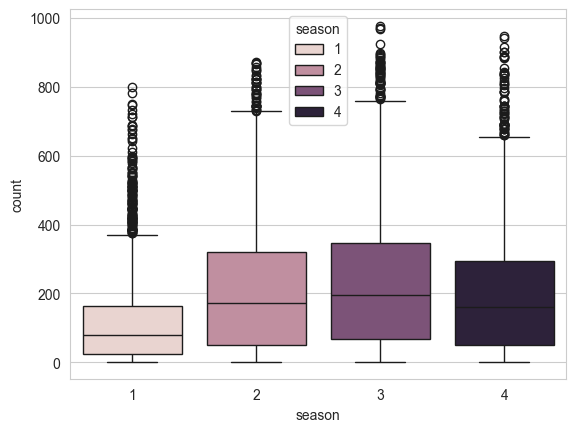

In [6]:
# Importando seaborn para visualizações estatísticas mais avançadas
import seaborn as sns

# Criando um boxplot para analisar a distribuição de contagens por estação do ano
ax = sns.boxplot(x="season", y="count",  # Estação no eixo x, contagem no eixo y
                 hue="season", data=bike)  # Colorir por estação

In [7]:
# Extraindo a hora do dia a partir da coluna datetime
from datetime import datetime  # Importando a classe datetime

bike['hour'] = bike.datetime.dt.strftime("%H").astype(int)  # Extraindo a hora como inteiro
bike.head()  # Exibindo as primeiras linhas com a nova coluna

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


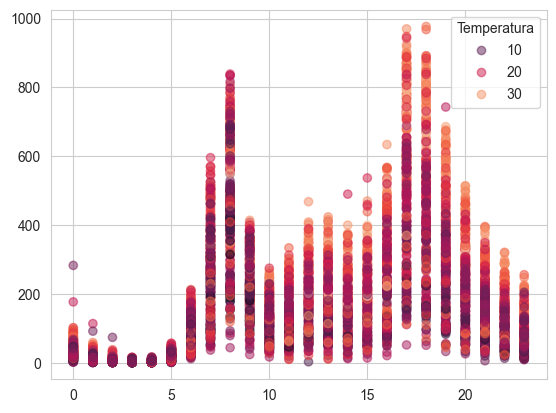

In [8]:
# Filtrando os dados para analisar apenas dias úteis
bike2 = bike.query('workingday == 1')  # Selecionando apenas linhas onde workingday = 1

# Criando um gráfico para analisar a relação entre hora do dia e contagem em dias úteis
fig, ax = plt.subplots()  # Criando uma figura e eixos
scatter = ax.scatter(bike2['hour'], bike2['count'],  # Hora no eixo x, contagem no eixo y
                     c=bike2.temp, label=bike2.temp, alpha=0.5)  # Colorindo pontos pela temperatura
ax.legend(*scatter.legend_elements(num=3),  # Criando uma legenda com 3 níveis de temperatura
          loc="upper right", title="Temperatura")  # Posicionando a legenda
plt.show()  # Exibindo o gráfico

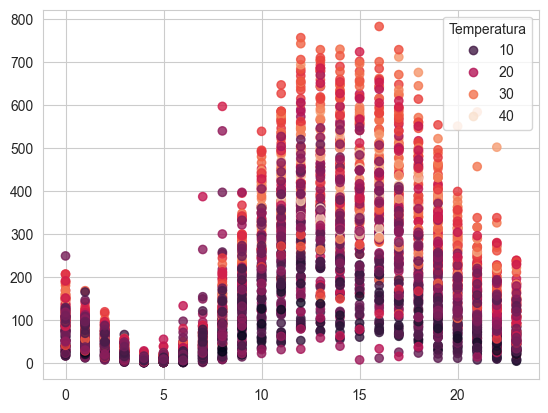

In [9]:
# Filtrando os dados para analisar apenas dias não úteis (fins de semana/feriados)
bike2 = bike.query('workingday == 0')  # Selecionando apenas linhas onde workingday = 0

# Criando um gráfico para analisar a relação entre hora do dia e contagem em dias não úteis
fig, ax = plt.subplots()  # Criando uma figura e eixos
scatter = ax.scatter(bike2['hour'], bike2['count'],  # Hora no eixo x, contagem no eixo y
                     c=bike2.temp, label=bike2.temp, alpha=0.8)  # Colorindo pontos pela temperatura
ax.legend(*scatter.legend_elements(num=4),  # Criando uma legenda com 4 níveis de temperatura
          loc="upper right", title="Temperatura")  # Posicionando a legenda
plt.show()  # Exibindo o gráfico

In [10]:
# Modelo de regressão linear simples - apenas temperatura como variável preditora
X = bike['temp'].values.reshape(-1, 1)  # Preparando os dados de entrada (reshape para formato 2D)
y = bike['count']  # Variável alvo (contagem de bicicletas)

# Criando e treinando o modelo de regressão linear
temp_model = LinearRegression().fit(X, y)

# Exibindo os coeficientes do modelo
print(temp_model.coef_)  # Coeficiente angular (inclinação da reta)
print(temp_model.intercept_)  # Intercepto (ponto onde a reta cruza o eixo y)

# Fazendo uma previsão com o modelo para temperatura = 25°C
new = np.array([25]).reshape(-1, 1)  # Preparando o novo dado para previsão
temp_model.predict(new)  # Prevendo a contagem esperada para temperatura de 25°C

# Modelo de regressão linear múltipla - usando várias variáveis preditoras
X = bike[['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'hour']]  # Múltiplas variáveis
y = bike['count']  # Variável alvo (contagem de bicicletas)

# Criando e treinando o modelo de regressão linear múltipla
temp_model = LinearRegression().fit(X, y)

# Exibindo os coeficientes do modelo
print(temp_model.coef_)  # Coeficientes para cada variável preditora
print(temp_model.intercept_)  # Intercepto do modelo

# Criando um novo conjunto de dados para fazer uma previsão específica
new_dataset = pd.DataFrame([{'season': 1, 'holiday': 0, 'workingday': 1,
                             'weather': 4, 'temp': 30, 'humidity': 85,
                             'windspeed': 2, 'hour': 8}])  # Um dia de trabalho, quente, úmido, às 8h

# Prevendo a contagem de bicicletas para esse cenário específico
temp_model.predict(new_dataset)  # Retorna a contagem prevista para as condições especificadas

[9.17054048]
6.046212959616611
[ 21.7033266  -10.2991433   -0.71781291  -3.20909065   7.01952948
  -2.21173705   0.20271198   7.61282553]
46.913687840854635


array([138.95910189])

A saída `[9.17054048]` é o resultado da predição do modelo de regressão linear múltipla para o cenário específico que você definiu no new_dataset. Este valor representa a contagem prevista de bicicletas alugadas nas seguintes condições:

- Estação: 1 (inverno)
- Feriado: 0 (não é feriado)
- Dia útil: 1 (é dia de trabalho)
- Clima: 4 (provavelmente condições climáticas adversas)
- Temperatura: 30°C (quente)
- Umidade: 85% (alta)
- Velocidade do vento: 2 (baixa)
- Hora: 8 (manhã/horário de pico)

Esta previsão de aproximadamente 9 bicicletas é o resultado do cálculo:

```Predição = Intercepto + (Coef_season × 1) + (Coef_holiday × 0) + (Coef_workingday × 1) + ... + (Coef_hour × 8)```

Onde:


Intercepto = 46.91
Coeficientes do modelo = `[21.70, -10.30, -0.72, -3.21, 7.02, -2.21, 0.20, 7.61]`
O valor baixo da predição (apenas 9 bicicletas) provavelmente se deve à combinação contraditória de fatores:

Clima adverso (valor 4) tem forte impacto negativo
Alta umidade (85%) também reduz a demanda
Mesmo com temperatura alta (30°C) e horário de pico (8h), estas condições não são suficientes para aumentar significativamente a contagem prevista

Esta análise permite entender como diferentes variáveis afetam a demanda por bicicletas compartilhadas neste modelo.